# Plotting the station on a map

## Python version

In [3]:
import sys

In [4]:
print(sys.version)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


## Import packages and data

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [6]:
url = 'https://gbfs.baywheels.com/gbfs/en/station_information.json'
req = requests.get(url)


In [7]:
df_sf = pd.DataFrame(req.json()['data']['stations']).drop(columns=['rental_uris'])

In [8]:
df_sf.columns

Index(['has_kiosk', 'lon', 'legacy_id', 'short_name',
       'eightd_station_services', 'eightd_has_key_dispenser', 'lat',
       'region_id', 'external_id', 'capacity', 'station_type', 'station_id',
       'electric_bike_surcharge_waiver', 'rental_methods', 'name'],
      dtype='object')

In [9]:
df_sf['region_id'].unique()

array(['5', '3', '14', '0', '12', '13', nan], dtype=object)

In [10]:
df_ext = df_sf.loc[df_sf['region_id'] == '0']

In [11]:
df_sf.loc[df_sf['name'].str.contains('Caltrain Station')]

,has_kiosk,lon,legacy_id,short_name,eightd_station_services,eightd_has_key_dispenser,lat,region_id,external_id,capacity,station_type,station_id,electric_bike_surcharge_waiver,rental_methods,name
143,True,-122.394495,465,SF-J29-3,[],False,37.776311,3,a7da1857-747a-4507-9d8f-2a9f95f0babf,18,classic,a7da1857-747a-4507-9d8f-2a9f95f0babf,False,"[KEY, CREDITCARD]",San Francisco Caltrain Station (King St at 4th...
184,True,-122.391885,130,SF-P30,[],False,37.757704,3,e7691d93-eed6-4388-b681-00ae0b455d23,35,classic,e7691d93-eed6-4388-b681-00ae0b455d23,False,"[KEY, CREDITCARD]",22nd St Caltrain Station


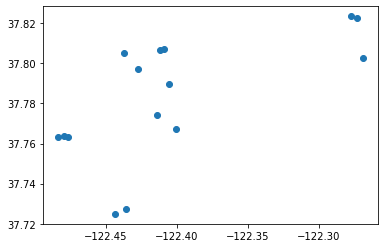

In [12]:
plt.scatter(df_ext.lon, df_ext.lat)

In [13]:
#!pip install zipf
import zipfile

In [14]:
with zipfile.ZipFile('tl_2021_06075_roads.zip', 'r') as zip_ref:
    zip_ref.extractall('shapefiles')

In [15]:
import geopandas as gpd 

In [16]:
# Import shapefile as GeoDataFrame
geo_df = gpd.read_file('shapefiles/tl_2021_06075_roads.shp')

In [17]:
geo_df

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110498938773,Hwy 101 S Off Rmp,M,S1400,"LINESTRING (-122.40410 37.74842, -122.40397 37..."
1,110498937425,Hwy 101 N on Rmp,M,S1400,"LINESTRING (-122.47441 37.80691, -122.47461 37..."
2,1108475858996,US Hwy 101 Bus,U,S1200,"LINESTRING (-122.42461 37.80130, -122.42460 37..."
3,1103660229533,Ludlow Aly - No Acc,M,S1780,"LINESTRING (-122.45959 37.73853, -122.45956 37..."
4,1104995434770,Old Mason St,M,S1400,"LINESTRING (-122.45456 37.80419, -122.45492 37..."
...,...,...,...,...,...
4078,110498939543,Friendship Ct,M,S1400,"LINESTRING (-122.43073 37.77781, -122.43084 37..."
4079,110498940789,None,None,S1400,"LINESTRING (-122.45077 37.77880, -122.45070 37..."
4080,110498932589,Flint St,M,S1400,"LINESTRING (-122.43654 37.76398, -122.43673 37..."
4081,110498939711,Twin Peaks Blvd,M,S1400,"LINESTRING (-122.44721 37.75404, -122.44687 37..."


In [18]:
df_sf.region_id.unique()

array(['5', '3', '14', '0', '12', '13', nan], dtype=object)

In [19]:
geo_df.loc[geo_df['FULLNAME'] == 'Octavia St']

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
1005,11016957645924,Octavia St,M,S1400,"LINESTRING (-122.42366 37.77178, -122.42369 37..."
2384,110498936857,Octavia St,M,S1400,"LINESTRING (-122.42780 37.79243, -122.42798 37..."
2902,110498936855,Octavia St,M,S1400,"LINESTRING (-122.42667 37.78692, -122.42687 37..."
4052,11016957645925,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42387 37..."
4082,11016957626758,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42366 37..."


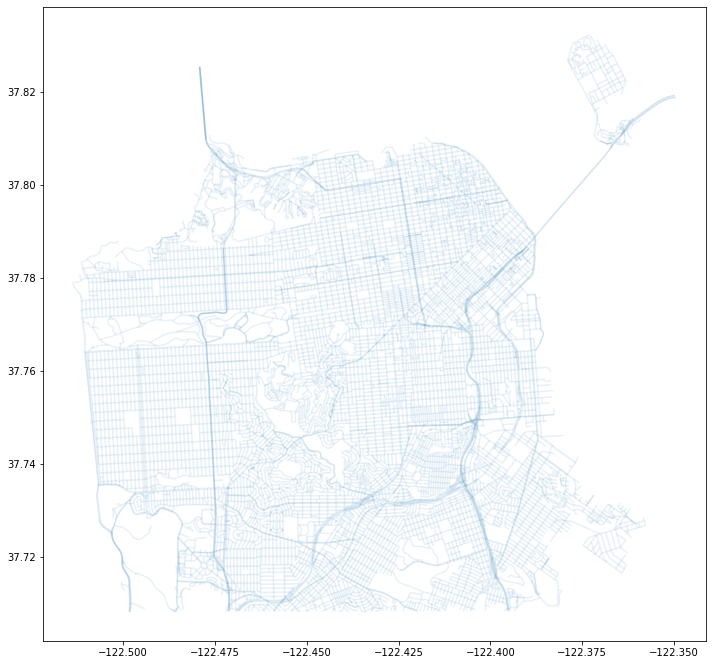

In [20]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
#ctx.add_basemap(ax)

# Turn off axis
#ax.set_axis_off()
# Save image
fig.tight_layout()

In [21]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [22]:
df_sf.loc[df_sf['lon'] < -122.35]

,has_kiosk,lon,legacy_id,short_name,eightd_station_services,eightd_has_key_dispenser,lat,region_id,external_id,capacity,station_type,station_id,electric_bike_surcharge_waiver,rental_methods,name
82,True,-122.411306,61,SF-J25,[],False,37.776513,3,6156f831-ca96-459d-aafe-685420751e4d,27,classic,6156f831-ca96-459d-aafe-685420751e4d,False,"[KEY, CREDITCARD]",Howard St at 8th St
83,True,-122.405514,459,SF-Q26,[],False,37.753259,3,9cac67a2-9219-455e-b3db-c771311c5b33,15,classic,9cac67a2-9219-455e-b3db-c771311c5b33,False,"[KEY, CREDITCARD]",Utah St at 24th St
85,True,-122.394760,116,SF-N29,[],False,37.764794,3,9a97cfb1-8882-4dfc-a075-2c22d646e457,31,classic,9a97cfb1-8882-4dfc-a075-2c22d646e457,False,"[KEY, CREDITCARD]",Mississippi St at 17th St
86,True,-122.416040,77,SF-K24,[],False,37.773507,3,49754dc9-1925-4020-a599-704c9f064b03,19,classic,49754dc9-1925-4020-a599-704c9f064b03,False,"[KEY, CREDITCARD]",11th St at Natoma St
87,True,-122.390833,104,SF-M30,[],False,37.767045,3,482f48f4-7ed6-4e69-a778-a2aba0f39c80,35,classic,482f48f4-7ed6-4e69-a778-a2aba0f39c80,False,"[KEY, CREDITCARD]",4th St at 16th St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,True,-122.405950,323,SF-C26-1,[],False,37.798014,3,07303af0-cf6e-46f2-bf9c-9ebb61f21adc,15,classic,07303af0-cf6e-46f2-bf9c-9ebb61f21adc,False,"[KEY, CREDITCARD]",Broadway at Kearny St
491,True,-122.479407,367,OutsideTempStation,"[{'docks_availability': 'UNLIMITED', 'link_for...",False,37.770669,NaN,c77092b2-476f-498f-8a15-18c9ee51e920,31,classic,367,False,"[CREDITCARD, KEY]",Outside Lands (Temporary Station)
492,True,-122.442729,577,SF-C18,[],False,37.799175,NaN,82ad4cff-001f-49a8-88fa-a5a63d64b9a2,22,classic,577,False,"[CREDITCARD, KEY]",Divisadero St at Lombard St
493,True,-122.444305,578,SF-X16,[],False,37.730655,NaN,41b2200f-7915-410b-95c6-084bc4d3dee8,19,classic,578,False,"[CREDITCARD, KEY]",Detroit St at Hearst Ave


In [23]:
# Add a geometry column that holds Point objects
df_sf['geometry'] = df_sf.apply(lambda x: Point(float(x.lon), float(x.lat)), axis=1)
# Convert Pandas DataFrame to a GeoDataFrame
stations_gpdf = gpd.GeoDataFrame(df_sf.loc[df_sf['lon'] < -122.35], geometry='geometry')
# Initialize crs to 4326 because that's the format of our geomtry
#starbucks_geo_df.crs = "EPSG:4326"
# Change the crs to match our SF GeoDataFrame
#starbucks_geo_df = starbucks_geo_df.to_crs(epsg = 3857)


/home/ec2-user/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [24]:
stations_gpdf

,has_kiosk,lon,legacy_id,short_name,eightd_station_services,eightd_has_key_dispenser,lat,region_id,external_id,capacity,station_type,station_id,electric_bike_surcharge_waiver,rental_methods,name,geometry
82,True,-122.411306,61,SF-J25,[],False,37.776513,3,6156f831-ca96-459d-aafe-685420751e4d,27,classic,6156f831-ca96-459d-aafe-685420751e4d,False,"[KEY, CREDITCARD]",Howard St at 8th St,POINT (-122.41131 37.77651)
83,True,-122.405514,459,SF-Q26,[],False,37.753259,3,9cac67a2-9219-455e-b3db-c771311c5b33,15,classic,9cac67a2-9219-455e-b3db-c771311c5b33,False,"[KEY, CREDITCARD]",Utah St at 24th St,POINT (-122.40551 37.75326)
85,True,-122.394760,116,SF-N29,[],False,37.764794,3,9a97cfb1-8882-4dfc-a075-2c22d646e457,31,classic,9a97cfb1-8882-4dfc-a075-2c22d646e457,False,"[KEY, CREDITCARD]",Mississippi St at 17th St,POINT (-122.39476 37.76479)
86,True,-122.416040,77,SF-K24,[],False,37.773507,3,49754dc9-1925-4020-a599-704c9f064b03,19,classic,49754dc9-1925-4020-a599-704c9f064b03,False,"[KEY, CREDITCARD]",11th St at Natoma St,POINT (-122.41604 37.77351)
87,True,-122.390833,104,SF-M30,[],False,37.767045,3,482f48f4-7ed6-4e69-a778-a2aba0f39c80,35,classic,482f48f4-7ed6-4e69-a778-a2aba0f39c80,False,"[KEY, CREDITCARD]",4th St at 16th St,POINT (-122.39083 37.76704)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,True,-122.405950,323,SF-C26-1,[],False,37.798014,3,07303af0-cf6e-46f2-bf9c-9ebb61f21adc,15,classic,07303af0-cf6e-46f2-bf9c-9ebb61f21adc,False,"[KEY, CREDITCARD]",Broadway at Kearny St,POINT (-122.40595 37.79801)
491,True,-122.479407,367,OutsideTempStation,"[{'docks_availability': 'UNLIMITED', 'link_for...",False,37.770669,NaN,c77092b2-476f-498f-8a15-18c9ee51e920,31,classic,367,False,"[CREDITCARD, KEY]",Outside Lands (Temporary Station),POINT (-122.47941 37.77067)
492,True,-122.442729,577,SF-C18,[],False,37.799175,NaN,82ad4cff-001f-49a8-88fa-a5a63d64b9a2,22,classic,577,False,"[CREDITCARD, KEY]",Divisadero St at Lombard St,POINT (-122.44273 37.79918)
493,True,-122.444305,578,SF-X16,[],False,37.730655,NaN,41b2200f-7915-410b-95c6-084bc4d3dee8,19,classic,578,False,"[CREDITCARD, KEY]",Detroit St at Hearst Ave,POINT (-122.44430 37.73066)


Text(0.5, 1.0, 'Baywheels Stations in San Francisco')

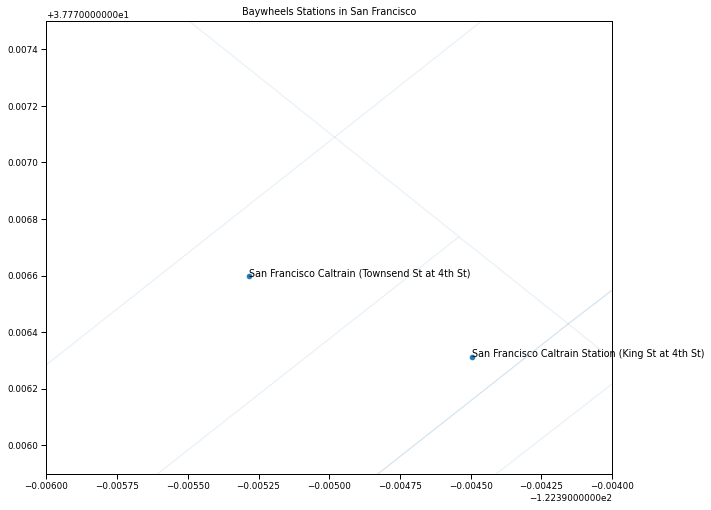

In [25]:
# Change context for readability
sns.set_context("paper")
# Initialize our plot
fig, ax = plt.subplots(figsize=(10, 10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
stations_gpdf.plot(ax=ax)

min_lat, max_lat = (37.7759, 37.7775)
min_lon, max_lon = (-122.396, -122.394)

for point in stations_gpdf.loc[(stations_gpdf['lon'].between(min_lon, max_lon))
                               & (stations_gpdf['lat'].between(min_lat, max_lat))].index:
    ax.text(stations_gpdf.loc[point]['lon'], stations_gpdf.loc[point]['lat'], stations_gpdf.loc[point]['name'])
# Add in a background using contextily
#ctx.add_basemap(ax)
# Turn off axis
ax.set_xlim((min_lon, max_lon))
ax.set_ylim((min_lat, max_lat))
#ax.set_axis_off()
fig.tight_layout()
plt.title("Baywheels Stations in San Francisco")

<AxesSubplot:>

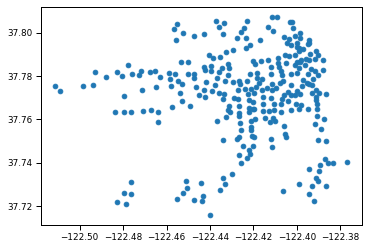

In [26]:
stations_gpdf.plot()

In [27]:
!ls

creds.yaml	     mapping.ipynb     shapefiles
direction_api.ipynb  README.md	       test_data
etl.ipynb	     requirements.txt  tl_2021_06075_roads.zip


In [28]:
new_data = pd.read_pickle('test_data')

In [29]:
new_data.head()

,index,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
9,586,electric_bike,2022-04-03 10:41:53,2022-04-03 11:13:38,Commercial St at Montgomery St,SF-E27,Union Square (Powell St at Post St),SF-F26,37.794143,-122.402867,37.788300,-122.408531,casual
91,15773,electric_bike,2022-04-03 11:59:20,2022-04-03 12:11:30,Commercial St at Montgomery St,SF-E27,Chestnut St at Van Ness Ave,SF-B22,37.794066,-122.402945,37.802300,-122.424413,casual
92,15774,electric_bike,2022-04-03 13:18:36,2022-04-03 13:46:13,Commercial St at Montgomery St,SF-E27,18th St at Noe St,SF-O19,37.794093,-122.403066,37.761047,-122.432642,casual
124,18318,classic_bike,2022-04-03 11:25:03,2022-04-03 11:33:58,Commercial St at Montgomery St,SF-E27,Jones St at Post St,SF-G25,37.794246,-122.402855,37.787327,-122.413278,member
166,32564,electric_bike,2022-04-03 12:05:38,2022-04-03 12:19:04,Commercial St at Montgomery St,SF-E27,Washington St at Van Ness Ave,SF-E22,37.793875,-122.402611,37.792980,-122.423302,member


In [30]:
new_data['geometry'] = new_data.apply(lambda x: Point(float(x.end_lng), float(x.end_lat)), axis=1)

/home/ec2-user/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [31]:
new_data

,index,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,geometry
9,586,electric_bike,2022-04-03 10:41:53,2022-04-03 11:13:38,Commercial St at Montgomery St,SF-E27,Union Square (Powell St at Post St),SF-F26,37.794143,-122.402867,37.788300,-122.408531,casual,POINT (-122.40853071212769 37.788299978150825)
91,15773,electric_bike,2022-04-03 11:59:20,2022-04-03 12:11:30,Commercial St at Montgomery St,SF-E27,Chestnut St at Van Ness Ave,SF-B22,37.794066,-122.402945,37.802300,-122.424413,casual,POINT (-122.4244135 37.8023)
92,15774,electric_bike,2022-04-03 13:18:36,2022-04-03 13:46:13,Commercial St at Montgomery St,SF-E27,18th St at Noe St,SF-O19,37.794093,-122.403066,37.761047,-122.432642,casual,POINT (-122.4326417 37.7610471)
124,18318,classic_bike,2022-04-03 11:25:03,2022-04-03 11:33:58,Commercial St at Montgomery St,SF-E27,Jones St at Post St,SF-G25,37.794246,-122.402855,37.787327,-122.413278,member,POINT (-122.41327822208405 37.7873267660624)
166,32564,electric_bike,2022-04-03 12:05:38,2022-04-03 12:19:04,Commercial St at Montgomery St,SF-E27,Washington St at Van Ness Ave,SF-E22,37.793875,-122.402611,37.792980,-122.423302,member,POINT (-122.4233016371727 37.792979854977766)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32341,135155,electric_bike,2022-03-03 17:04:38,2022-03-03 17:17:49,Commercial St at Montgomery St,SF-E27,St. Joseph's Ave at Geary Blvd,SF-H17,37.793994,-122.403130,37.782574,-122.442203,member,POINT (-122.442203 37.782574)
32398,179465,electric_bike,2022-03-03 13:18:38,2022-03-03 13:27:47,Commercial St at Montgomery St,SF-E27,None,None,37.793962,-122.402751,37.790000,-122.410000,member,POINT (-122.41 37.79)
32446,179481,electric_bike,2022-03-03 06:27:56,2022-03-03 06:29:54,Commercial St at Montgomery St,SF-E27,None,None,37.793935,-122.402910,37.790000,-122.400000,member,POINT (-122.4 37.79)
32467,181087,electric_bike,2022-03-03 15:34:26,2022-03-03 15:51:12,Commercial St at Montgomery St,SF-E27,None,None,37.794135,-122.402972,37.770000,-122.410000,casual,POINT (-122.41 37.77)


In [32]:
new_data_gpdf = gpd.GeoDataFrame(new_data.loc[new_data['started_at'].dt.hour.isin([7, 17])], geometry='geometry')

In [63]:
ext = new_data.iloc[0]
ext.loc['end_lat'] = 37.785016
ext.loc['end_lng'] = -122.398553
ext.loc['start_station_name'] = None
ext.loc['end_station_id'] = None
ext['geometry'] = Point(float(ext.end_lng), float(ext.end_lat))

ext_gpdf = gpd.GeoDataFrame(pd.DataFrame(ext).T, geometry='geometry')

/tmp/ipykernel_7853/2600174398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext.loc['end_lat'] = 37.785016
/tmp/ipykernel_7853/2600174398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext.loc['end_lng'] = -122.398553
/tmp/ipykernel_7853/2600174398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext.loc['start_station_name'] = None
/tmp/ipykernel_7853/2600174398.py:5: SettingWithCopyWarning: 
A value is trying to be set

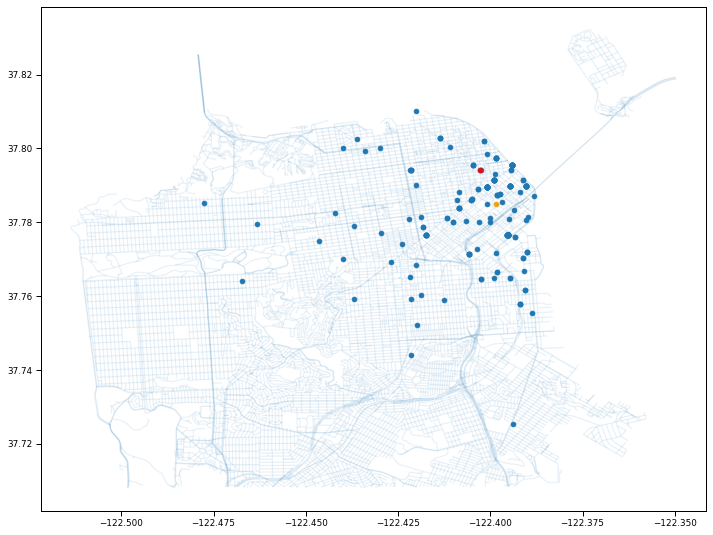

In [67]:
# Change context for readability
sns.set_context("paper")
# Initialize our plot
fig, ax = plt.subplots(figsize=(10, 10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha=.1)
new_data_gpdf.plot(ax=ax)
ext_gpdf.plot(ax=ax, color='orange')
stations_gpdf.loc[stations_gpdf['name'] == 'Commercial St at Montgomery St'].plot(ax=ax, color='red')

fig.tight_layout()

In [62]:
ext_gpdf

,index,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,geometry
9,586,electric_bike,2022-04-03 10:41:53,2022-04-03 11:13:38,None,SF-E27,Union Square (Powell St at Post St),None,37.794143,-122.402867,-122.398553,-122.408531,casual,POINT (-122.409 -122.399)


In [34]:
new_data.loc[new_data['started_at'].dt.hour.isin([7, 17])].mean()

/tmp/ipykernel_7853/2682403036.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_data.loc[new_data['started_at'].dt.hour.isin([7, 17])].mean()
/tmp/ipykernel_7853/2682403036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.loc[new_data['started_at'].dt.hour.isin([7, 17])].mean()


index        161371.428571
start_lat        37.794193
start_lng      -122.402921
end_lat          37.782898
end_lng        -122.404130
dtype: float64

In [46]:
new_data.loc[new_data['started_at'].dt.hour.isin([7])].mean()

/tmp/ipykernel_7853/3058220032.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_data.loc[new_data['started_at'].dt.hour.isin([7])].mean()
/tmp/ipykernel_7853/3058220032.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.loc[new_data['started_at'].dt.hour.isin([7])].mean()


index        154478.000000
start_lat        37.794227
start_lng      -122.402917
end_lat          37.785016
end_lng        -122.398553
dtype: float64

In [42]:
ext = new_data.iloc[0]

In [43]:
ext

index                                                            586
rideable_type                                          electric_bike
started_at                                       2022-04-03 10:41:53
ended_at                                         2022-04-03 11:13:38
start_station_name                    Commercial St at Montgomery St
start_station_id                                              SF-E27
end_station_name                 Union Square (Powell St at Post St)
end_station_id                                                SF-F26
start_lat                                                  37.794143
start_lng                                                -122.402867
end_lat                                                      37.7883
end_lng                                                  -122.408531
member_casual                                                 casual
geometry              POINT (-122.40853071212769 37.788299978150825)
Name: 9, dtype: object

In [47]:
ext.loc['end_lat'] = 37.785016
ext.loc['end_lng'] = -122.398553
ext.loc['start_station_name'] = None
ext.loc['end_station_id'] = None


/tmp/ipykernel_7853/1045966989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext.loc['end_lat'] = 37.785016
/tmp/ipykernel_7853/1045966989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext.loc['end_lat'] = -122.398553
/tmp/ipykernel_7853/1045966989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext.loc['start_station_name'] = None
/tmp/ipykernel_7853/1045966989.py:4: SettingWithCopyWarning: 
A value is trying to be set

In [48]:
ext

index                                                            586
rideable_type                                          electric_bike
started_at                                       2022-04-03 10:41:53
ended_at                                         2022-04-03 11:13:38
start_station_name                                              None
start_station_id                                              SF-E27
end_station_name                 Union Square (Powell St at Post St)
end_station_id                                                  None
start_lat                                                  37.794143
start_lng                                                -122.402867
end_lat                                                  -122.398553
end_lng                                                  -122.408531
member_casual                                                 casual
geometry              POINT (-122.40853071212769 37.788299978150825)
Name: 9, dtype: object

In [49]:
ext['geometry'] = Point(float(ext.end_lng), float(ext.end_lat))

/tmp/ipykernel_7853/3143995292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext['geometry'] = Point(float(ext.end_lng), float(ext.end_lat))


In [53]:
pd.DataFrame(ext).T

,index,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,geometry
9,586,electric_bike,2022-04-03 10:41:53,2022-04-03 11:13:38,None,SF-E27,Union Square (Powell St at Post St),None,37.794143,-122.402867,-122.398553,-122.408531,casual,POINT (-122.40853071212769 -122.398553)
